This is a spam detection project of SMS dataset.In this project we basicaly use Naive Bayes moodel

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import files
upload = files.upload()

Saving spam.csv to spam.csv


In [3]:
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [8]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [11]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [12]:
#check duplicates values
df.duplicated().sum()

403

In [13]:
#drop duplicates value
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(5169, 2)

In [15]:
df['v1'].replace('spam',1,inplace=True)
df['v1'].replace('ham',0,inplace=True)

In [16]:
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


***Exploratory data analysis***

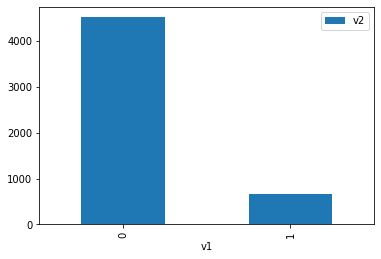

In [17]:
df.groupby('v1').count().plot(kind='bar')

In [18]:
spam_msg = df[df['v1']==1]
spam_msg

,v1,v2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [19]:
spam_words = ''.join(spam_msg['v2'])

In [20]:
spam_words

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'sFreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcvWINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 infoURGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or c

In [21]:
from wordcloud import WordCloud,STOPWORDS

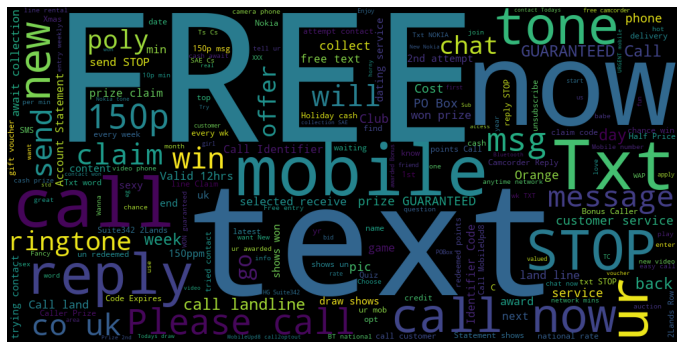

In [22]:
pos_cloud = WordCloud(width=1000,height=500).generate(spam_words)
plt.figure(figsize=(12,12))
plt.imshow(pos_cloud)
plt.axis('off')
plt.show()

In [23]:
ham_msg = df[df['v1']==0]
ham_msg

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
6,0,Even my brother is not like to speak with me. ...
...,...,...
5565,0,Huh y lei...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [24]:
ham_words = ''.join(ham_msg['v2'])
ham_words

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...Ok lar... Joking wif u oni...U dun say so early hor... U c already then say...Nah I don\'t think he goes to usf, he lives around here thoughEven my brother is not like to speak with me. They treat me like aids patent.As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends CallertuneI\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today.I\'ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.I HAVE A DATE ON SUNDAY WITH WILL!!Oh k...i\'m watching here:)Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet.Fine if thatåÕs the way u feel. ThatåÕs the way its gota 

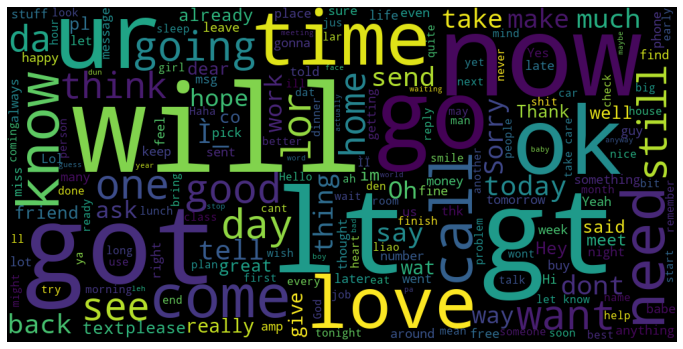

In [25]:
pos_cloud = WordCloud(width=1000,height=500).generate(ham_words)
plt.figure(figsize=(12,12))
plt.imshow(pos_cloud)
plt.axis('off')
plt.show()

In [26]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
def text_processing(text):
  #remove punctuations
  tokenizer = nltk.RegexpTokenizer(r'\w+')
  new_word = tokenizer.tokenize(text)
  
  #remove number
  new_word = [word for word in new_word if word.isalpha()]

  #word lemmatization
  lemmatizer = WordNetLemmatizer()
  new_word = [lemmatizer.lemmatize(word) for word in new_word]

  #remove stop words
  new_word = [word for word in new_word if word not in set(stopwords.words('english'))]
  
  return ' '.join(new_word)

In [29]:
text_processing("I am debapriya. my email's address is debapriya.bolpur@gmail.com and my mobile no is 8001382346")

'I debapriya email address debapriya bolpur gmail com mobile'

In [30]:
df['v3'] = df['v2'].apply(text_processing)

In [31]:
#convert text to matrix of tokens
CV = CountVectorizer()
bow = CV.fit_transform(df['v3'])

In [32]:
X_train,X_test,y_train,y_test = train_test_split(bow,df['v1'],test_size=.3,random_state=0)

In [33]:
#creaate and train naive bayes model
from sklearn.naive_bayes import MultinomialNB
BNB = MultinomialNB()
BNB.fit(X_train,y_train)
prediction = BNB.predict(X_test)

In [34]:
prediction

array([0, 0, 0, ..., 0, 0, 1])

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
matrix1 = confusion_matrix(y_test,prediction)
matrix2 = classification_report(y_test,prediction)
print('confusion matrix:\n',matrix1)
print('classification report:\n',matrix2)

confusion matrix:
 [[1312   30]
 [  13  196]]
classification report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1342
           1       0.87      0.94      0.90       209

    accuracy                           0.97      1551
   macro avg       0.93      0.96      0.94      1551
weighted avg       0.97      0.97      0.97      1551



In [36]:
"""texts = ['Free tones Hope you enjoyed your new content',"No. I meant the calculation is the same. That I'll call later",
        "Had your contract mobile 11 Mnths? Latest Motorola Now","WINNER!! You just won a free ticket to Bahamas. Send your Details"
        ]"""
texts = ["Payment Protection Insurance (PPI)IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.",
"Quick Loans A [redacted] loan for £950 is approved for you if you receive this SMS. 1 min verification & cash in 1 hr at www.[redacted].co.uk to opt out reply stop",
"Accident compensation You have still not claimed the compensation you are due for the accident you had. To start the process please reply YES. To opt out text STOP",
"Debt forgiveness Due to a new legislation, those struggling with debt can now apply to have it written off. For more information text the word INFO or to opt out text STOP",
"Pension reviews Our records indicate your Pension is under performing to see higher growth and up to 25% cash release reply PENSION for a free review. To opt out reply STOP"
]
"""texts = ["Whenever you feel sad just remember that there are millions and millions of cells in your body, and all they care about is you. Good Morning",
"Start Your day with the sweetest smile. Good Morning Enjoy a lovely day",
"You are the best girlfriend and you mean everything to me. You are a gift sent by God that I will cherish and honor.",
"Without your love in my life, life is dull and boring. You bring the bright colors of the rainbow to my life, even on the most cloudiest of days. Thank you my love.",
"A Good Apology Has 3 Parts! 1) I am Sorry 2) Its My Fault and 3) What Can I Do To Make It Right? But Most Of The People Miss The third Part.",
"Dear Brain, Sorry for Overloading you, Dear Tummy Sorry for The Butterflies, Dear Pillow Sorry for the Tears and Dear Heart Sorry for the Damage.",
"Forgive You Again? For Making Me Cry? For All Things you Said About Me? For All Crap you Started? For Stabing My Back? No I Wont forgive you, Not This Time.",
"A boy found Aladdin’s lamp, he asked him to increase all girls brain ten times more. He laughed and said: Multiplication does not apply on zero.",
"All girls are beautiful, after the lights are switched off – Shakespeare. All boys are innocent before the lights are off – shakespeare’s wife."
]"""
for text in texts:
  bow = CV.transform([text])
  predict = BNB.predict(bow.toarray())
  if predict == 1:
    print("Spam")
  else:
    print("Ham")

Spam
Spam
Spam
Spam
Spam


In [37]:
import pickle

In [38]:
BNBobj = open("bnb.pkl","wb")
pickle.dump(BNB,BNBobj)
BNBobj.close()
CVobj = open("CV.pkl","wb")
pickle.dump(CV,CVobj)
CVobj.close()